### Nearest neighbours:
* Nearest neighbours for classification
* Nearest neighbours for regression 
* Understanding data preprocessing 
* Data Preprocessing required for Nearest Neighbours 
* Understanding Bias-Variance Trade off 

* Calculation of vector distances
* Euclidian
* Manhatten
* Minkowiski

### Nearest neighboours for classification 

In [1]:
from sklearn.datasets import make_blobs,make_regression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)

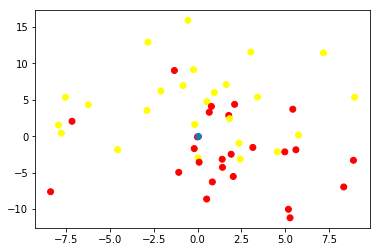

In [4]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y, cmap='autumn')
plt.scatter(x=[0],y=[0])

In [5]:
Y[:5]

array([0, 1, 0, 0, 1])

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knc = KNeighborsClassifier(n_neighbors=5)

In [8]:
knc.fit(X,Y)

KNeighborsClassifier()

In [9]:
knc.predict([[0,0]])

array([1])

In [10]:
knc.kneighbors([[0,0]])

(array([[0.09026019, 1.62288776, 1.7027197 , 2.53739911, 2.96878674]]),
 array([[ 6, 46, 31, 17,  8]], dtype=int32))

In [11]:
neighbours = X[[25,  5, 19, 11, 27]]

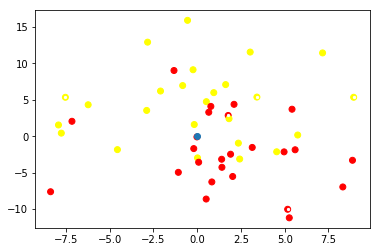

In [12]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y, cmap='autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbours[:,0],neighbours[:,1],s=5,c='w')

### For regression 

In [13]:
X,Y = make_regression(n_features=2,n_samples=50)

In [14]:
X[:5]

array([[ 0.03493192,  0.35506427],
       [-0.84346374,  0.12059651],
       [-0.1025897 , -1.52941063],
       [ 0.13978589,  0.23642472],
       [-0.47373644, -1.29546946]])

In [15]:
Y[:5]

array([  28.21071569,  -69.76443301, -117.07400625,   29.59426446,
       -135.05201582])

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knr = KNeighborsRegressor(n_neighbors=5)

In [18]:
knr.fit(X,Y)

KNeighborsRegressor()

In [19]:
knr.kneighbors([[0,0]])

(array([[0.02856348, 0.17310826, 0.25225096, 0.2746575 , 0.27544505]]),
 array([[42, 21, 31,  3, 22]], dtype=int32))

In [20]:
neighbours = X[[26, 44,  4, 32, 31]]

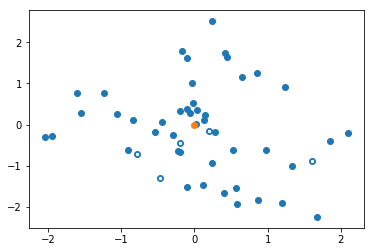

In [21]:
plt.scatter(x=X[:,0], y=X[:,1], cmap='autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbours[:,0],neighbours[:,1],s=5,c='w')

### Why data preprocessing:
* data is never in such state that ML algo works best.
* Text dont work on ML. Those have to converted into numbers 
* Numbers need to be scaled for better performance 

In [23]:
import pandas as pd

In [24]:
house_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt",index_col = 'Unnamed: 0')

In [25]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [27]:
house_data[['Sqft','Bedroom','Price']].head()

,Sqft,Bedroom,Price
1,1177.698,2,62000
2,2134.800,4,78000
3,1138.560,2,58000
4,1458.780,3,45000
5,967.776,3,45000


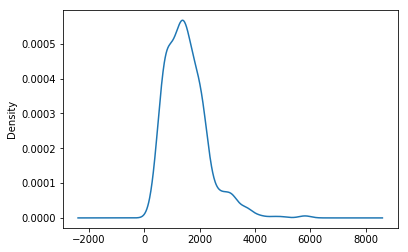

In [28]:
house_data.Sqft.plot.kde()

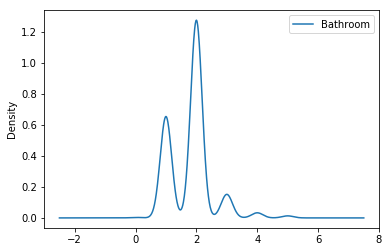

In [29]:
house_data[['Bathroom']].plot.kde()

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
mm = MinMaxScaler()

### splitting data into feature and target column  

In [32]:
feature = house_data.drop(columns=['Price'])
target = house_data.Price

In [33]:
feature[:5]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
1,1177.698,2,7,2,2,2
2,2134.800,5,7,4,2,2
3,1138.560,5,7,2,2,1
4,1458.780,2,7,3,2,2
5,967.776,11,14,3,2,2


In [34]:
target[:5]

1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

### Splitting data(feature & target) into train & test

In [35]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(feature, target)


In [37]:
trainX.shape

(483, 6)

In [38]:
trainY.shape

(483,)

In [39]:
mm = MinMaxScaler()

In [40]:
mm.fit(trainX)

MinMaxScaler()

In [42]:
mm.data_min_

array([377.148,   1.   ,   1.   ,   1.   ,   0.   ,   0.   ])

In [43]:
mm.data_max_



array([5.856468e+03, 2.200000e+01, 3.800000e+01, 7.000000e+00,
       3.000000e+00, 5.000000e+00])

In [44]:
mm.data_range_

array([5.47932e+03, 2.10000e+01, 3.70000e+01, 6.00000e+00, 3.00000e+00,
       5.00000e+00])

In [45]:
trainX_tf = mm.transform(trainX)

In [46]:
knr = KNeighborsRegressor(n_neighbors=5)

In [47]:
knr.fit(trainX_tf,trainY)

KNeighborsRegressor()

In [49]:
testX_tf = mm.transform(testX)


In [50]:
predictions = knr.predict(testX_tf)

In [51]:
pd.DataFrame({'Actual':testY, 'Prediction':predictions})[:5]

,Actual,Prediction
250,48800,34999.8
285,50000,65380.0
214,35000,31600.0
358,61000,50777.6
557,45000,58000.0


In [52]:
knr.score(testX_tf,testY)

0.5881169190642491

### Easy way to find k¶


In [53]:
for k in range(2,8):
    print ('k = ',k)
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(trainX_tf,trainY)
    print('Train Acc',knr.score(trainX_tf,trainY))
    print('Test Acc',knr.score(testX_tf,testY))

k =  2
Train Acc 0.8929935145088805
Test Acc 0.578645219632687
k =  3
Train Acc 0.853672443991221
Test Acc 0.6082237934062533
k =  4
Train Acc 0.8250179214969439
Test Acc 0.6036660984864981
k =  5
Train Acc 0.8033814846508578
Test Acc 0.5881169190642491
k =  6
Train Acc 0.7778936182047229
Test Acc 0.5926476711598454
k =  7
Train Acc 0.7605632503994784
Test Acc 0.587048880860003


### Important Conclusions
* k is inversely proportional to model complexity
* Model complexity is directly proportinal to variance & inversely proportional to bias